In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv


 Dataset Link - https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

Importing libraries to perform analysis.

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Transforming the dataset into Pandas dataframe.

In [3]:
supermarket_sales_data=pd.read_csv('/kaggle/input/supermarket-sales/supermarket_sales - Sheet1.csv')

Making a copy of the dataframe so that the original dataframe doesn't gets changed after any operation on the dataframe.

In [4]:
df=supermarket_sales_data.copy()

Reading few data from the dataframe to get overview.

In [5]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6


Displaying the columns of the dataframe.

In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Displaying  5 rows of the Dataset for getting an overview of the data in the dataset.

In [7]:
df.sample(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
846,585-90-0249,A,Yangon,Member,Male,Electronic accessories,73.26,1,3.6630,76.9230,1/27/2019,18:08,Ewallet,73.26,4.761905,3.6630,9.7
301,573-10-3877,B,Mandalay,Member,Male,Health and beauty,39.01,1,1.9505,40.9605,3/12/2019,16:46,Credit card,39.01,4.761905,1.9505,4.7
803,759-29-9521,A,Yangon,Member,Female,Fashion accessories,48.96,9,22.0320,462.6720,3/4/2019,11:27,Cash,440.64,4.761905,22.0320,8.0
692,689-05-1884,A,Yangon,Member,Male,Health and beauty,48.63,10,24.3150,510.6150,3/4/2019,12:44,Cash,486.30,4.761905,24.3150,8.8
695,800-09-8606,A,Yangon,Member,Female,Home and lifestyle,87.37,5,21.8425,458.6925,1/29/2019,19:45,Cash,436.85,4.761905,21.8425,6.6


# Finding shape of our dataset.

In [8]:
print('The number of rows are:',df.shape[0])
print('The number of columns are:',df.shape[1])

The number of rows are: 1000
The number of columns are: 17


# Checking for null values.

In [9]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

No null values in any column.

# Fetching description about the dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

As I see Date  column is represented as object dtype changing it to datetime dtype.

In [11]:
df.Date=pd.to_datetime(df.Date)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

# Fetching overall statistics on the dataframe.

In [13]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,0.000000,11.708825,1.71858


# Finding aggregate sales among branches.

In [14]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [15]:
df['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

(array([], dtype=float64), [])

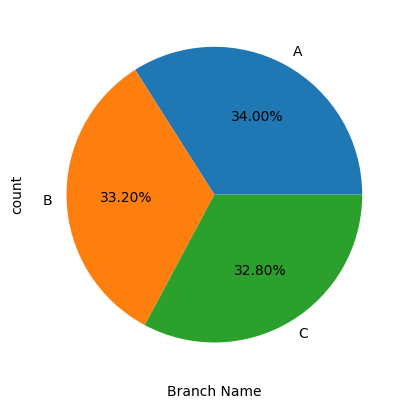

In [16]:
df['Branch'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.xlabel('Branch Name',fontsize=10)
plt.xticks(fontsize=8) 

Branch 'A' has more sales

# Finding most popular payment methods used by customers.

In [17]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [18]:
df.Payment.value_counts().sort_values(ascending=False).head(1)

Payment
Ewallet    345
Name: count, dtype: int64

Payment method distribution.

<Axes: >

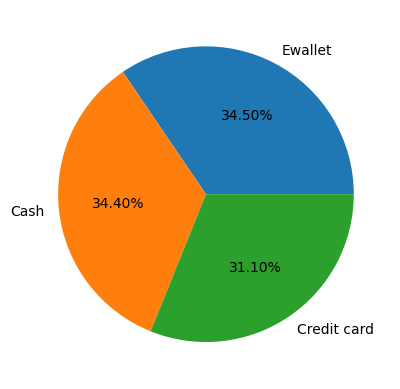

In [19]:
df.Payment.value_counts().sort_values(ascending=False).plot(kind='pie',autopct='%1.2f%%',ylabel='')

# Finding the customer ratings distribution.

In [20]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [21]:
df.Rating.value_counts().sort_values(ascending=False)

Rating
6.0     26
6.6     24
4.2     22
9.5     22
6.5     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: count, Length: 61, dtype: int64

<Axes: xlabel='Rating'>

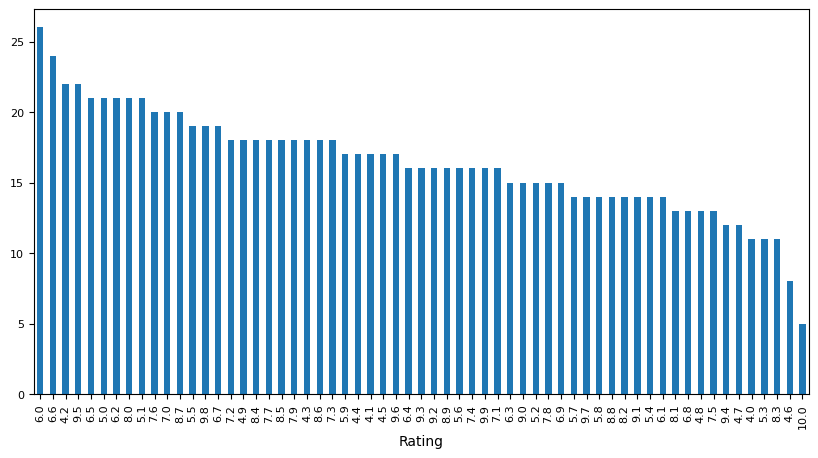

In [22]:
df.Rating.value_counts().plot(kind='bar',figsize=(10,5),fontsize=8)

# Findinf average gross income according to cities.

In [23]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [68]:
df.pivot_table(index='City',values='gross income',aggfunc='mean')

,gross income
City,
Mandalay,15.232024
Naypyitaw,16.052367
Yangon,14.874001


<Axes: xlabel='City', ylabel='Gross Income'>

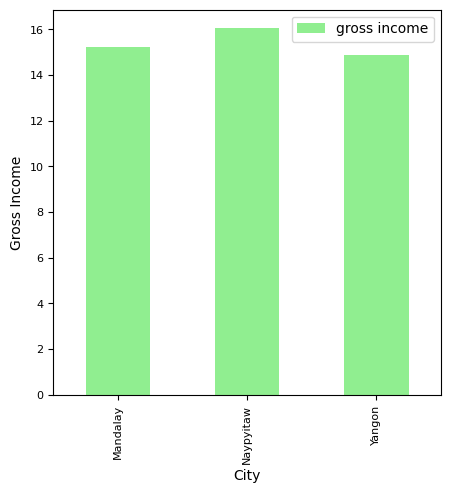

In [90]:
df.pivot_table(index='City',values='gross income',aggfunc='mean').plot(kind='bar',xlabel='City',ylabel='Gross Income',fontsize=8,figsize=(5,5),color='lightgreen')

# Product catergory with average rating in different branch.

In [92]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [98]:
df.pivot_table(index='Product line',columns='Branch',values='Rating',aggfunc='mean')

Branch,A,B,C
Product line,,,
Electronic accessories,6.911667,7.116364,6.747273
Fashion accessories,6.878431,6.722581,7.440000
Food and beverages,7.253448,6.994000,7.080303
Health and beauty,6.900000,7.100000,6.998077
Home and lifestyle,6.930769,6.516000,7.060000
Sports and travel,7.257627,6.509677,7.028889


# Finding the most profitable branch as per gross income

In [99]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [102]:
df.pivot_table(index='Branch',values='gross income',aggfunc='max')

,gross income
Branch,
A,49.49
B,48.69
C,49.65


<Axes: xlabel='Branch'>

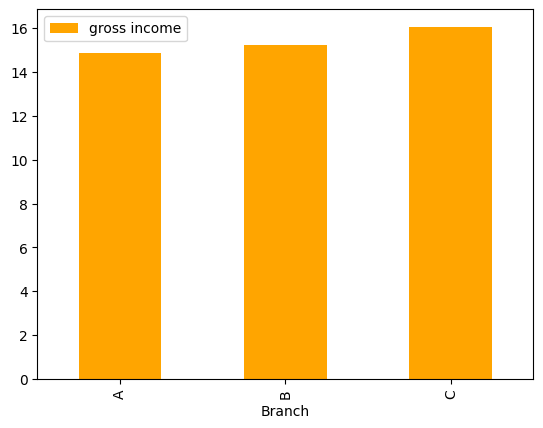

In [112]:
df.pivot_table(index='Branch',values='gross income',aggfunc='mean').plot(kind='bar',color=['orange'])
